#**Amazon Stock Market Predictions - Data Science Final Project**
#**Hana Meah - 16048117**
##**Prophet model**
##Part 3 out of 3 code files
##File 1 : LSTM model - train from scratch option 1
##File 2 : GRU model - train from scratch option 2
##File 3 : Prophet - pretrained option

In [1]:
import pandas as pd
from prophet import Prophet
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [2]:

# Load Amazon stock data from Yahoo Finance from 2001-01-02 to 2024-07-08
ticker = "AMZN"
df = yf.download(ticker, start="2001-01-02", end="2024-07-08")

# Drop any rows with null values
df.dropna(inplace=True)

# Prepare the data for Prophet
prophet_df = df[['Close']].reset_index()
prophet_df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)


[*********************100%***********************]  1 of 1 completed


In [9]:
# Initialize and fit the Prophet model
model = Prophet()
model.fit(prophet_df)

# Make predictions for the entire data range
n = 365
future = model.make_future_dataframe(periods=n)  # n number of future days
forecast = model.predict(future)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1gf0szpa/0bg72nr4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1gf0szpa/8ttg4bbz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21073', 'data', 'file=/tmp/tmp1gf0szpa/0bg72nr4.json', 'init=/tmp/tmp1gf0szpa/8ttg4bbz.json', 'output', 'file=/tmp/tmp1gf0szpa/prophet_model632lc4ih/prophet_model-20240904000251.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:02:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:02:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


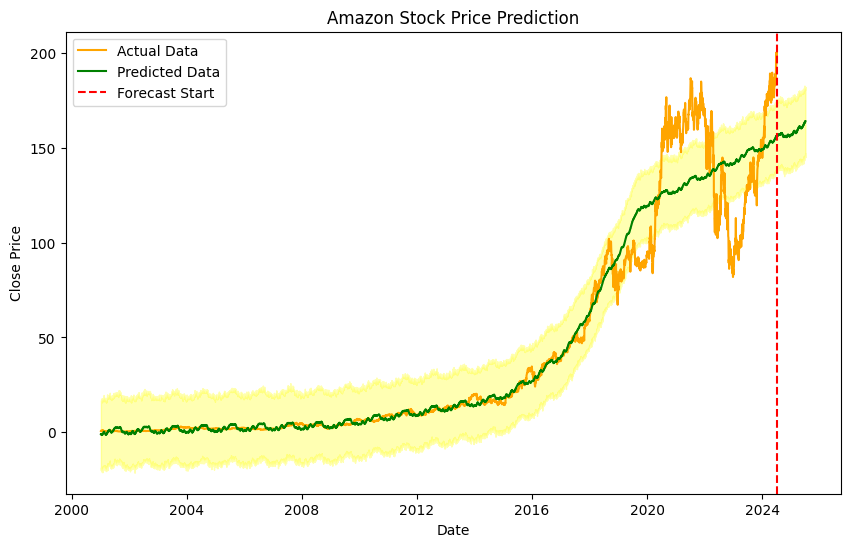

In [10]:
# Plot actual vs. predicted data
plt.figure(figsize=(10, 6))
plt.plot(prophet_df['ds'], prophet_df['y'], label='Actual Data', color='orange')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted Data', color='green')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='yellow', alpha=0.3)
plt.axvline(x=prophet_df['ds'].max(), color='red', linestyle='--', label='Forecast Start')  # Line indicating the start of the forecast period
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [11]:
# Merge actual and predicted values
results = pd.merge(prophet_df[['ds', 'y']], forecast[['ds', 'yhat']], on='ds')

# Calculate errors
mae = mean_absolute_error(results['y'], results['yhat'])
mse = np.sqrt(mean_squared_error(results['y'], results['yhat']))

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')


Mean Absolute Error: 7.411110468082467
Mean Squared Error: 14.126393506592102


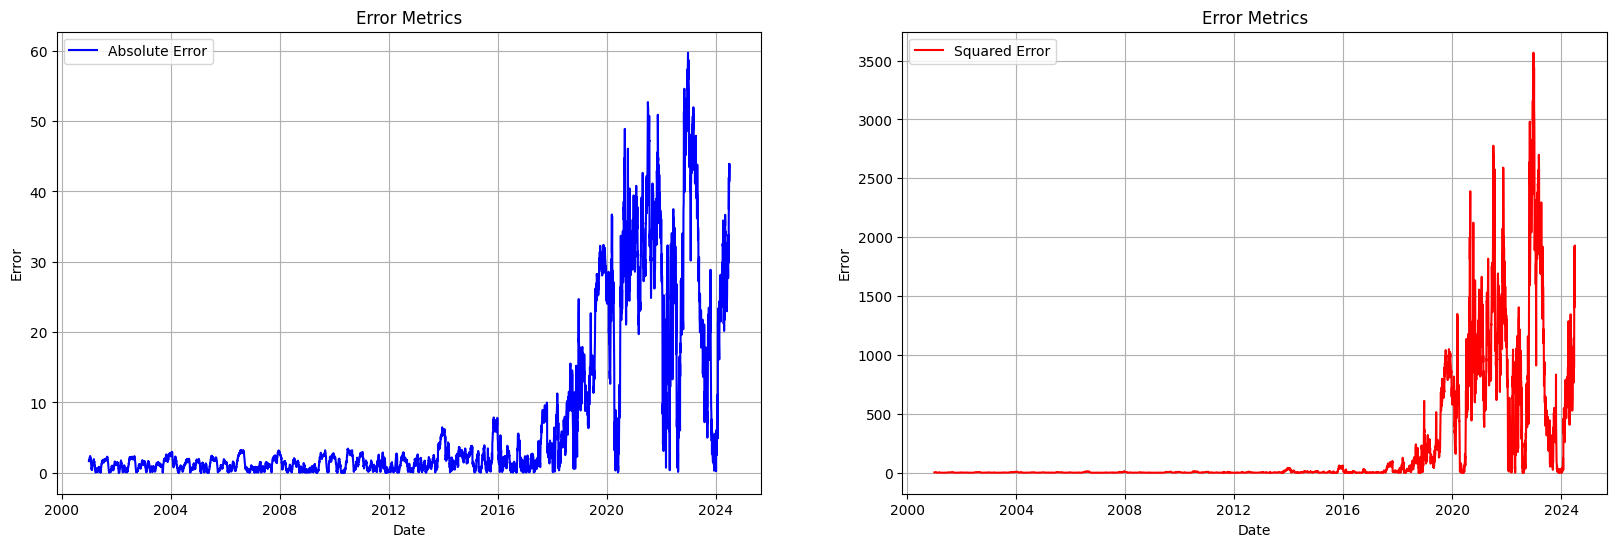

In [ ]:
# Create a 1x2 subplot layout
plt.figure(figsize=(20, 6))

# Plot error metrics over the test set
errors = results[['ds', 'y', 'yhat']].copy()
errors['absolute_error'] = abs(errors['y'] - errors['yhat'])
errors['squared_error'] = (errors['y'] - errors['yhat']) ** 2

plt.subplot(1, 2, 1)
plt.plot(errors['ds'], errors['absolute_error'], label='Absolute Error', color='blue')
plt.title('Error Metrics')
plt.xlabel('Date')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(errors['ds'], errors['squared_error'], label='Squared Error', color='red')
plt.title('Error Metrics')
plt.xlabel('Date')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
